In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
omdb = pd.read_json('movies/data/omdb-data.json.gz', lines=True)

In [3]:
wiki = pd.read_json('movies/data/wikidata-movies2.json.gz', lines=True)

In [4]:
wiki_omdb = wiki.merge(omdb, on=['imdb_id'])

In [5]:
wiki_omdb = wiki_omdb[['imdb_id','omdb_genres', 'nbox', 'publication_date']]

In [6]:
# genres = wiki_omdb['omdb_genres'].str.join('|').str.get_dummies()
# genres.reset_index(drop=True, inplace=True)
# wiki_omdb = pd.concat([wiki_omdb, genres], axis=1).dropna()


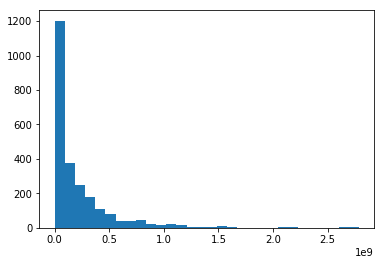

0.0


In [7]:

x = wiki_omdb
lst_col = 'omdb_genres'

# https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
wiki_omdb = pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len())for col in x.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
wiki_omdb = wiki_omdb.dropna()

plt.hist(wiki_omdb['nbox'], bins=30)
plt.show()
print(stats.normaltest(wiki_omdb['nbox']).pvalue)

In [8]:
def date_to_year(date):
    tokens = date.split('-')
    return int(tokens[0])
wiki_omdb['publication_date'] = wiki_omdb['publication_date'].apply(date_to_year)

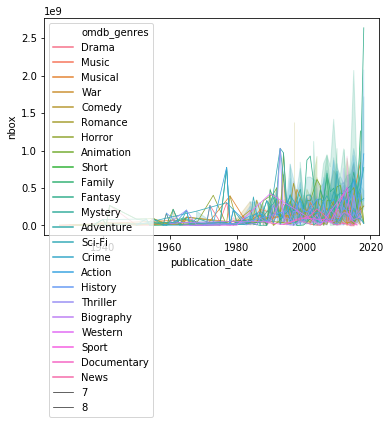

In [16]:
wiki_omdb2 = wiki_omdb.groupby(['imdb_id', 'omdb_genres', 'publication_date'], as_index=False)['nbox'].aggregate(np.mean)
del wiki_omdb2['imdb_id']
# wiki_omdb2 = wiki_omdb2.drop_duplicates(subset='publication_date', keep="last")
# wiki_omdb2

# sns.tsplot(wiki_omdb2, time='publication_date', unit = "omdb_genres", value='nbox')
sns.lineplot(x="publication_date", y="nbox",hue="omdb_genres", data=wiki_omdb2, size=8)
